<h2 align='center'>Aprendizado Supervisionado no Neurônio Perceptron <br> Programação Orientada a Objetos</h2>
<h3>Alex T. Carvalho <br> 1515080008 </h3>
<h3>Hiago Oliveira de Jesus <br> 1515280014 </h3>

### Parte I – Resolvendo um Problema Linearmente Separável

Nesta parte utilizou-se o arquivo dataAll.txt e construi-se o algoritmo de treinamento do neurônio Perceptron.

#### Classe Perceptron


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

class Perceptron():  
    #Leitura do conjunto de dados e configuração dos valores da taxa de aprendizado e da função degrau.
    def __init__(self, arquivo, eta=0.1, teta=0.0):
        self.entrada = np.fromfile(arquivo)
        self.entrada = self.entrada.reshape(self.entrada.__len__()//3, 3)
        self.treino, self.teste = self.entrada[:, 0:2], self.entrada[:, 2:3]
        self.eta, self.teta = eta, teta
    
    #Definindo o conjunto de treinamento e o conjunto de teste.
    def init_entrada(self, treino, teste):
        self.treino, self.treino = treino, teste

    #Inicializando o vetor de pesos com valores aleatórios uniformes.
    def init_pesos(self, min=-0.5, max=0.5):
        self.pesos_iniciais = self.pesos = np.random.uniform(low=min, high=max, size=2)
        
    #Algoritmo de treinamento do neurônio perceptron.
    def treinamento(self, limite=False, particao=False):     
        self.limite = limite
        convergencia = False
        self.ajustes = self.epocas = 0
        self.total_epocas = self.total_ajustes = np.array([])
        
        print('Pesos iniciais ', np.round(self.pesos_iniciais, 4))
        
        while not convergencia:            
            #Particionando o conjunto de dados em 70% para treinamento e 30% para teste.
            if particao:
                self.particionamento()
                self.true_positive = self.true_negative = self.false_positive = self.false_negative = 0
                
            erros = np.array([])
            
            for xi, yd in zip(self.treino, self.teste):
                #Cálculo da função de ativação.
                yp = (1.0 if np.array(xi * self.pesos).sum() > self.teta else 0.0)
                erros = np.append(erros, [yd - yp])
                
                #Calculando a matriz de confusão.
                if particao:
                    self.matriz_confusao(yd, yp)
            
            if (not np.count_nonzero(erros)) or (self.limite and self.epocas == 100):
                convergencia = True
            else:
                #Ajustando os pesos
                for xi, erro in zip(self.treino, erros):
                    if erro != 0:
                        self.ajustes += 1
                        self.total_ajustes = np.append(self.total_ajustes, self.ajustes)        
                    self.pesos = self.pesos + (self.eta * erro * xi)
                
                self.epocas += 1
                self.total_epocas = np.append(self.total_epocas, self.epocas)   
                
                
                if not self.limite:
                    print('\n{0}º época, {1} ajustes'.format(self.epocas, self.ajustes))
                    print('Pesos ', np.round(self.pesos, 4))
        
        #Calculando as métricas de desempenho.
        if particao:
            self.matriz()
            self.acuracia()

        print('\nPesos Finais ', np.round(self.pesos, 4))
        print('\nTotal de épocas {0}\nTotal de ajustes {1}'.format(self.epocas, self.ajustes))
        print('\nEta ', self.eta)    
            
    #Retorna o conjunto de dados e o resultado do treinamento do neurônio Perceptron.
    def grafico(self):
        return (self.entrada, self.treino, self.pesos, self.teste)
        
    #Retorna o número de épocas até a convergência e o número total de ajustes no vetor de pesos.
    def mean_std(self):
        return (self.total_epocas, self.total_ajustes)
    
    #Particionando o conjunto de dados em 70% para treinamento e 3% para teste
    def particionamento(self):
        np.random.shuffle(self.entrada)
        tamanho = self.entrada.__len__()
        particao1 = tamanho - int((tamanho * 30)/100)
        particao2 = tamanho - int((tamanho * 70)/100)

        indices = np.random.permutation(tamanho)

        self.treino = self.entrada[0:particao1, 0:2]
        self.teste = self.entrada[0:particao2, 2:3].astype(int)
      
    #Configurando a matriz de confusão.
    def matriz_confusao(self, yd, yp):
        if yd == 1.0 and yp == 1.0:
            #True Positive
            self.true_positive += 1

        if yd == 1.0 and yp == 0.0:
            #True Negative
            self.true_negative += 1 

        if yd == 0.0 and yp == 0.0:
            #False Positive
            self.false_positive += 1

        if yd == 0.0 and yp == 1.0:
            #False Negative
            self.false_negative += 1
    
    #Gerando a tabela da matriz de confusão
    def matriz(self):
        d = pd.DataFrame([[self.true_positive, self.true_negative], [self.false_positive, self.false_negative]],
                        columns=['Positive', 'Negative'], index=['True', 'False'])
        print('\tMatriz de Confusão\n', d.head())
        
    #Calculando a métrica de revocação.
    def Recall(self):
        recall = self.true_positive / (self.true_positive + self.false_negative)
        return recall
    
    #Calculando a métrica de precisão.
    def Precision(self):
        precision = self.true_positive / (self.true_positive + self.false_positive)
        return precision
    
    #Calculando a métrica de f-score.
    def F_score(self):
        recall = self.Recall()
        precision = self.Precision()
        fscore = (2 * recall * precision) / (recall + precision)
        return (recall, precision, fscore)
    
    #Gerando a tabela de acurácia com as métricas de revocação, precisão e f-score.
    def acuracia(self):
        recall, precision, fscore = self.F_score()
        recall = np.round(recall, 2)
        precision = np.round(precision, 2)
        fscore = np.round(fscore, 2)
        
        d = pd.DataFrame([[recall, precision, fscore]], columns=['Recall', 'Precision', 'F-Score'], index=['Acurácia'])
        print('\tMétricas de Desempenho\n', d.head())
        

O gráfico contendo todos os exemplos do conjunto de dados e a reta que separa as classes obtida como resultado do  treinamento do neurônio Perceptron. 

A classe 0 é denotada na cor vermelha, a classe 1 é denotada na cor azul e reta que separa as classes é denotada cor preta.

Pesos iniciais  [-0.432   0.4974]

1º época, 972 ajustes
Pesos  [ 28435.9694 -35399.8004]

2º época, 1016 ajustes
Pesos  [ 31470.9398 -32685.6763]

3º época, 1024 ajustes
Pesos  [ 31961.2173 -32203.6465]

4º época, 1026 ajustes
Pesos  [ 32131.2439 -32034.1752]

Pesos Finais  [ 32131.2439 -32034.1752]

Total de épocas 4
Total de ajustes 1026

Eta  0.1


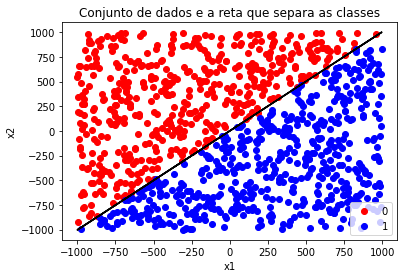

In [24]:
#Método que gera um gráfico de dispersão contendo o conjunto de dados e a reta que separa as classes
def grafico(data, title):
    x, xi, w = data[0], data[1], data[2]
    x0, x1 = x[np.array(np.where(x == 0))[0:]], x[np.array(np.where(x == 1))[0:]]
    plt.scatter(x0[0][:, :1], x0[0][:, 1:2], color = 'red', label = "0")
    plt.scatter(x1[0][:, :1], x1[0][:, 1:2], color = 'blue', label = "1")
    plt.plot(xi, xi * (-w[0]/w[1]), 'black')
    
    plt.legend()
    plt.title(title)
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.show()    
    
if __name__ == '__main__':
    parte1 = Perceptron('dataAll.txt')
    parte1.init_pesos()
    parte1.treinamento()
    grafico(parte1.grafico(), 'Conjunto de dados e a reta que separa as classes')

### Parte II – Experimentação
Nesta segunda parte utilizou o identificador 0 (zero) para trabalhar com o arquivo data0.txt.

In [25]:
#Método que gera os rótulos do gráfico de barras
def rotulo(rects, ax):
    for rect in rects:
        ax.annotate('{}'.format(rect.get_height()), xy=(rect.get_x() + rect.get_width()/2, rect.get_height()), xytext=(0, 2), textcoords="offset points", ha='center', va='baseline', fontsize=8)

#Método que gera um gráfico de barras contendo a média e o desvio padrão da quantidade de
#ajustes efetuados no vetor de pesos e do número de épocas até a convergência
def mean_std(data):
    labels = ['Épocas', 'Ajustes']
    
    epoca_mean, epoca_std = np.round(data[0].mean(), 2), np.round(data[0].std(), 2)
    ajustes_mean, ajustes_std = np.round(data[1].mean()), np.round(data[1].std())
    mean = [epoca_mean, ajustes_mean]
    std = [epoca_std, ajustes_std]

    x = np.arange(len(labels))
    width = 0.35
    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, mean, width, label='Média')
    rects2 = ax.bar(x + width/2, std, width, label='Desvio Padrão')

    ax.set_ylabel('Quantidade')
    ax.set_title('Média e o desvio padrão do número de épocas e ajustes')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    rotulo(rects1, ax)
    rotulo(rects2, ax)
    fig.tight_layout()
    plt.show()    

O algoritmo construído na Parte I foi executado com 100 iterações e testando-se 9 configurações.

Ao todo foram realizadas 900 repetições do algoritmo de treinamento implementado na Parte I.

Para cada configuração é apresentado um gráfico de dispersão contendo as entradas e a solução obtida.

Para cada configuração das 100 iterações, obteve-se a média e o desvio padrão da quantidade de
ajustes efetuados no vetor de pesos e do número de épocas até a convergência. 

Dispôs-se os resultados obtidos sobre a forma de um gráfico de barras.

Pesos iniciais  [-0.4847 -0.1032]

Pesos Finais  [-3.876  13.3132]

Total de épocas 100
Total de ajustes 9323

Eta  0.4


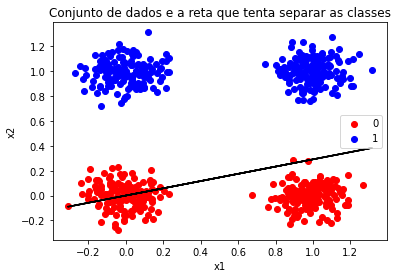

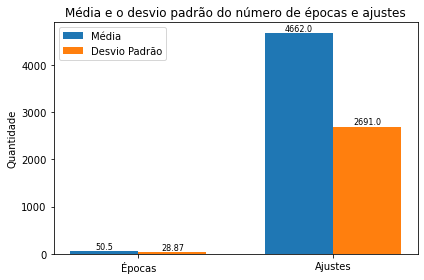

Pesos iniciais  [-0.8754 -0.1426]

Pesos Finais  [-19.3517  77.103 ]

Total de épocas 100
Total de ajustes 9551

Eta  0.4


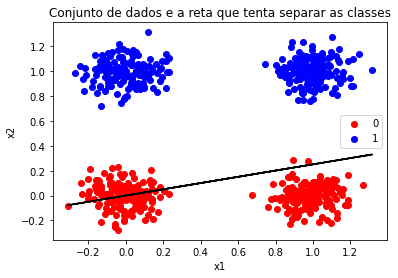

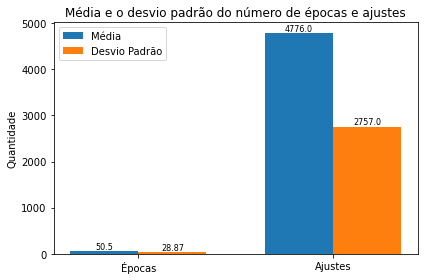

Pesos iniciais  [-0.1185 -0.4544]

Pesos Finais  [-26.6629  98.2089]

Total de épocas 100
Total de ajustes 9521

Eta  0.4


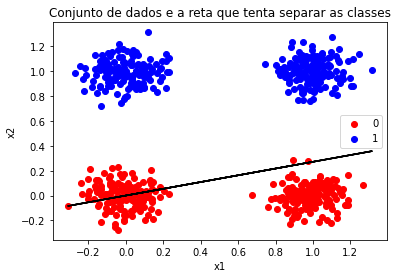

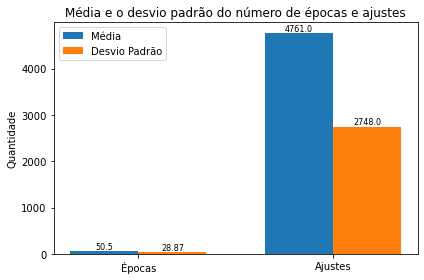

Pesos iniciais  [-0.232  -0.3922]

Pesos Finais  [-3.9806 14.0626]

Total de épocas 100
Total de ajustes 9345

Eta  0.1


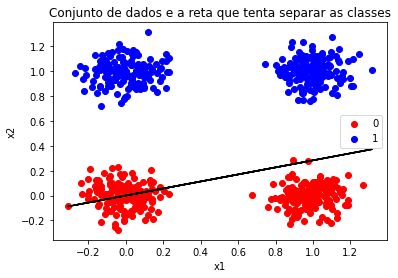

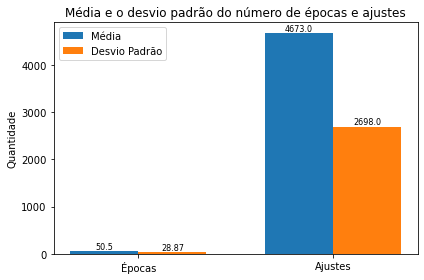

Pesos iniciais  [-0.6667 -0.5975]

Pesos Finais  [-4.886  13.3692]

Total de épocas 100
Total de ajustes 9445

Eta  0.1


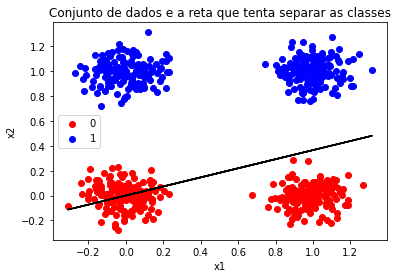

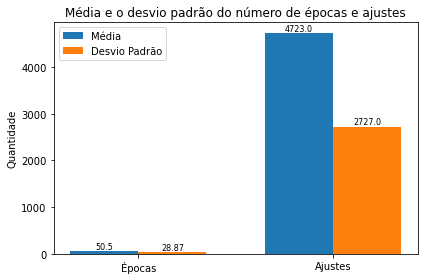

Pesos iniciais  [-0.4414  0.0343]

Pesos Finais  [-3.8416 13.5841]

Total de épocas 100
Total de ajustes 9452

Eta  0.1


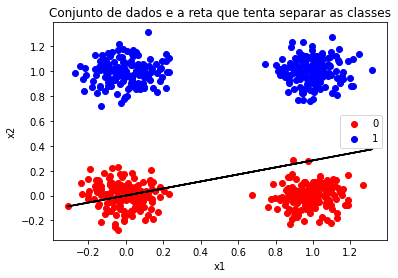

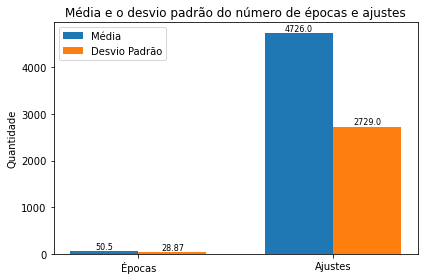

Pesos iniciais  [ 0.4909 -0.2594]

Pesos Finais  [-0.3879  1.4182]

Total de épocas 100
Total de ajustes 9365

Eta  0.01


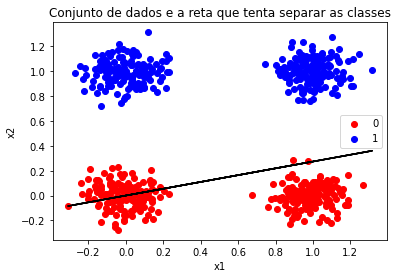

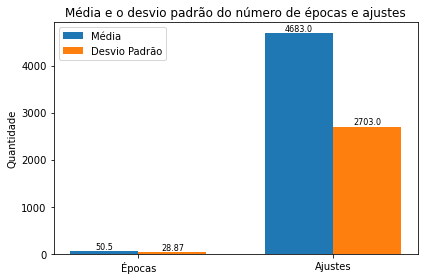

Pesos iniciais  [0.8724 0.3222]

Pesos Finais  [-0.274   1.0532]

Total de épocas 100
Total de ajustes 9395

Eta  0.01


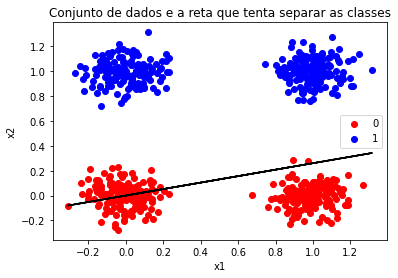

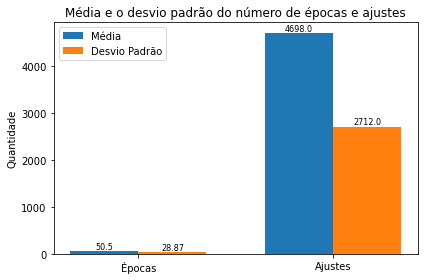

Pesos iniciais  [-0.2629 -0.4708]

Pesos Finais  [-0.507   1.6413]

Total de épocas 100
Total de ajustes 9513

Eta  0.01


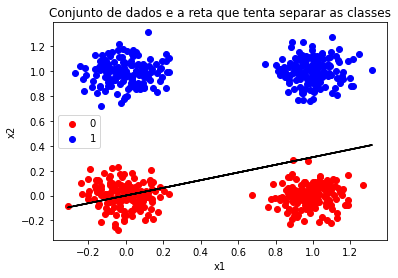

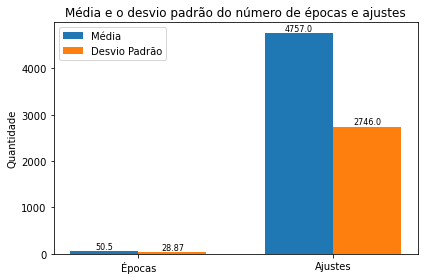

In [26]:
if __name__ == '__main__':
    for n in [0.4, 0.1, 0.01]:
        for peso in [(-0.5, 0.5), (-1, 1), (-0.5, 0.5)]:
            parte2 = Perceptron('data0.txt', eta=n)
            parte2.init_pesos(min=peso[0], max=peso[1])
            parte2.treinamento(limite=True)
            grafico(parte2.grafico(), 'Conjunto de dados e a reta que tenta separar as classes')
            mean_std(parte2.mean_std())

### Parte III – Validação Holdout em Problema Não-Linearmente Separável

Nesta parte, utilizando o arquivo dataHoldout.txt gerou-se um gráfico de dispersçao que evidencia que este problema não é linearmente separável.

Em seguida, dividiu-se o conjunto de dados em duas partições, uma delas contendo 70% dos exemplos (treinamento) e outra contendo 30% (teste). Embora o problema não seja linearmente separável, utilizou-se os dados de treinamento para obtenção de uma reta de separação das classes.

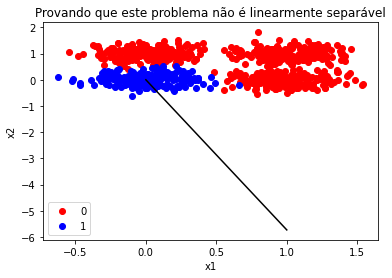

In [27]:
#Gerando um gráfico de dispersão com dados de treino e teste
def grafico_parte3(arquivo, treino, teste):
    parte3 = Perceptron(arquivo)
    parte3.init_pesos()
    parte3.init_entrada(treino, teste)
    grafico(parte3.grafico(), 'Provando que este problema não é linearmente separável')
    
if __name__ == '__main__':
    arquivo = 'dataHoldout.txt'
    
    entrada = np.fromfile(arquivo)
    entrada = entrada.reshape(entrada.__len__()//3, 3)
    tamanho = entrada.__len__()
    particao1 = tamanho - int((tamanho * 30)/100)
    particao2 = tamanho - int((tamanho * 70)/100)
    
    indices = np.random.permutation(tamanho)
        
    treino = entrada[0:particao1, 0:2]
    teste = entrada[0:particao2, 2:3].astype(int)
    
    grafico_parte3(arquivo, treino, teste)

Apresentando a matriz de confusão das previsões efetuadas para o conjunto de testes. E a acurácia da solução proposta para os dados do conjunto de treinamento, com os valores de precisão, revocação e F-Score.

In [41]:
parte3 = Perceptron('dataHoldout.txt', eta=0.4, teta=0.0)
parte3.init_pesos()
parte3.treinamento(limite=True, particao=True)

Pesos iniciais  [-0.1706 -0.388 ]
	Matriz de Confusão
        Positive  Negative
True         29        33
False       178         0
	Métricas de Desempenho
           Recall  Precision  F-Score
Acurácia     1.0       0.14     0.25

Pesos Finais  [-1.2216 -1.1851]

Total de épocas 100
Total de ajustes 3923

Eta  0.4


Executou-se o algoritmo de treinamento por 100 épocas, em cada época particionou-se o conjunto de dados em 70% para conjunto de treinamento e 30% para conjunto de teste, em cada particionamento o dados foram organizados em ordem aleatória. Acerca da qualidade desta solução perante o conjunto de testes verificou-se que em muitas partições a métrica de revocação alcançava 100% de acurácia. No entanto, somente a revocação não garante a qualidade da acurácia do algoritmo de treinamento do neurônio Perceptron trabalhando com dados não linearmente separáveis. Assim sendo, houve a necessidade de observação das métricas de precisão e f-score juntamente com a revocação. Assumindo-se as métricas de desempenho de revocação, precisão e f-score constatou a ineficácia  na classificação do algoritmo de treinamento do neurônio Perceptron perante os dados do arquivo dataHoldout.txt

Apresentando dois gráficos com a solução obtida pelo neurônio Perceptron, mas um deles contendo os dados de treinamento e o outro contendo os dados de teste. Tais gráficos dispostos lado a lado.

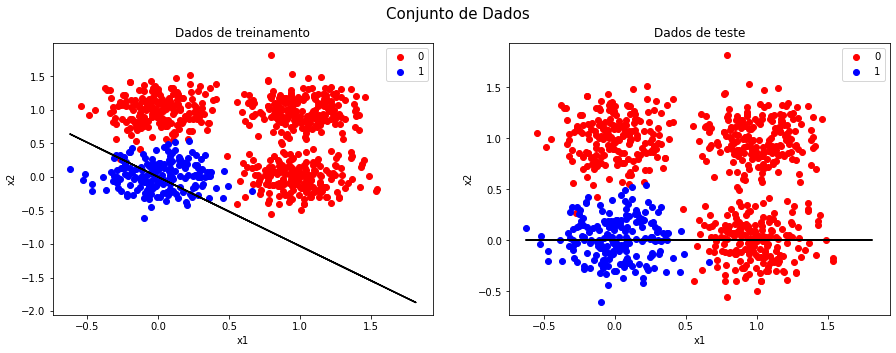

In [42]:
#Método que gera dois gráfico de dispersão lado a lado.
def grafico_lado(data, title1, title2):
    x, xi, w = data[0], data[1], data[2]
    x0, x1 = x[np.array(np.where(x == 0))[0:]], x[np.array(np.where(x == 1))[0:]]
 
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    fig.suptitle('Conjunto de Dados', fontsize=15)
    
    axs[0].set_title(title1)
    axs[1].set_title(title2)
    axs[0].set_xlabel('x1')
    axs[0].set_ylabel('x2')
    axs[1].set_xlabel('x1')
    axs[1].set_ylabel('x2')
    
    axs[0].scatter(x0[0][:, :1], x0[0][:, 1:2], color = 'red', label = "0")
    axs[0].scatter(x1[0][:, :1], x1[0][:, 1:2], color = 'blue', label = "1")
    axs[0].plot(xi, xi * (-w[0]/w[1]), 'black')

    
    x, xi, w = data[0], data[1], data[3]
    x0, x1 = x[np.array(np.where(x == 0))[0:]], x[np.array(np.where(x == 1))[0:]]
    axs[1].scatter(x0[0][:, :1], x0[0][:, 1:2], color = 'red', label = "0")
    axs[1].scatter(x1[0][:, :1], x1[0][:, 1:2], color = 'blue', label = "1")
    axs[1].plot(xi, xi * (-w[0]/w[1]), 'black')
    
    axs[0].legend()
    axs[1].legend()

    plt.show()

grafico_lado(parte3.grafico(), 'Dados de treinamento', 'Dados de teste')